In [11]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../utilities')

import utilities as util
import augmentations as aug
import visualization as viz
from training_utilities import TrainingMetrics, TrainingTimer
import glob
from astropy.io import fits
from random import randint
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Add two functions, one to retrieve input and GT and the other to retrieve input GT and prediction

In [12]:
def open_fits_with_mask(filename,DR = 2**14):
    image = fits.open(filename)
    cloud = image[0].data
    mask = image[1].data
    del image

    # Normalize image
    cloud  = cloud / DR
    return cloud , mask

def open_fits_with_mask_and_pred(filename,DR = 2**14):
    image = fits.open(filename)
    cloud = image[0].data
    mask = image[1].data
    pred = image[2].data
    del image

    # Normalize image
    cloud  = cloud / DR
    return cloud , mask, pred

In [14]:
train_images_list = glob.glob('../Results/LWIRISEG/Results/*Train*.fits')
val_images_list = glob.glob('../Results/LWIRISEG/Results/*Val*.fits')
print(len(train_images_list))
print(len(val_images_list))

200
200


In [15]:
train_fits = []
for indx in range(len(train_images_list)):
    train_fits.append(open_fits_with_mask_and_pred(filename=train_images_list[indx],DR = 1))

val_fits = []
for indx in range(len(val_images_list)):
    val_fits.append(open_fits_with_mask_and_pred(filename=val_images_list[indx],DR = 1))

Look manually for good images

In [34]:
indx = indx + 1
nb = indx*3
print(nb-3)
print(nb-2)
print(nb-1)
viz.plot_image_preds(train_fits[nb-3:nb],figsize_per_row=(8,2), save=True)


In [36]:
viz.plot_image_preds([train_fits[171], train_fits[46], train_fits[48]], figsize_per_row=(8,2), save=True)

In [16]:
indx = 0

69
70
71


/home/wassim/Projects/kelian/infrared-cloud-detection/notebooks/../utilities/visualization.py:190: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


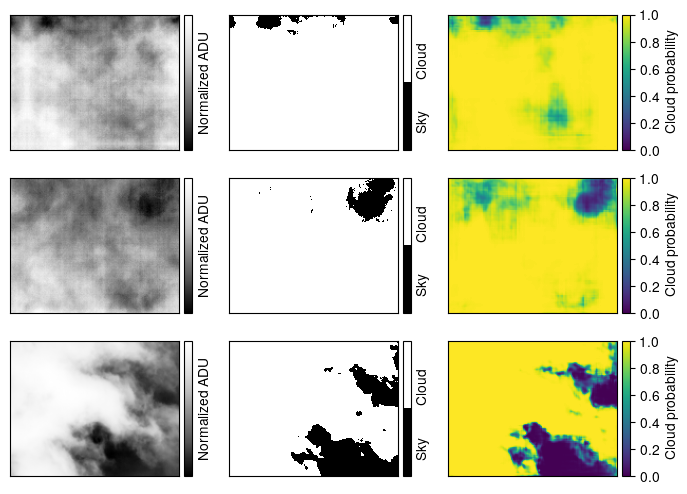

In [29]:
indx = indx + 1
nb = indx*3
print(nb-3)
print(nb-2)
print(nb-1)
viz.plot_image_preds(train_fits[nb-3:nb],figsize_per_row=(8,2), save=True)


/home/wassim/Projects/kelian/infrared-cloud-detection/notebooks/../utilities/visualization.py:194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


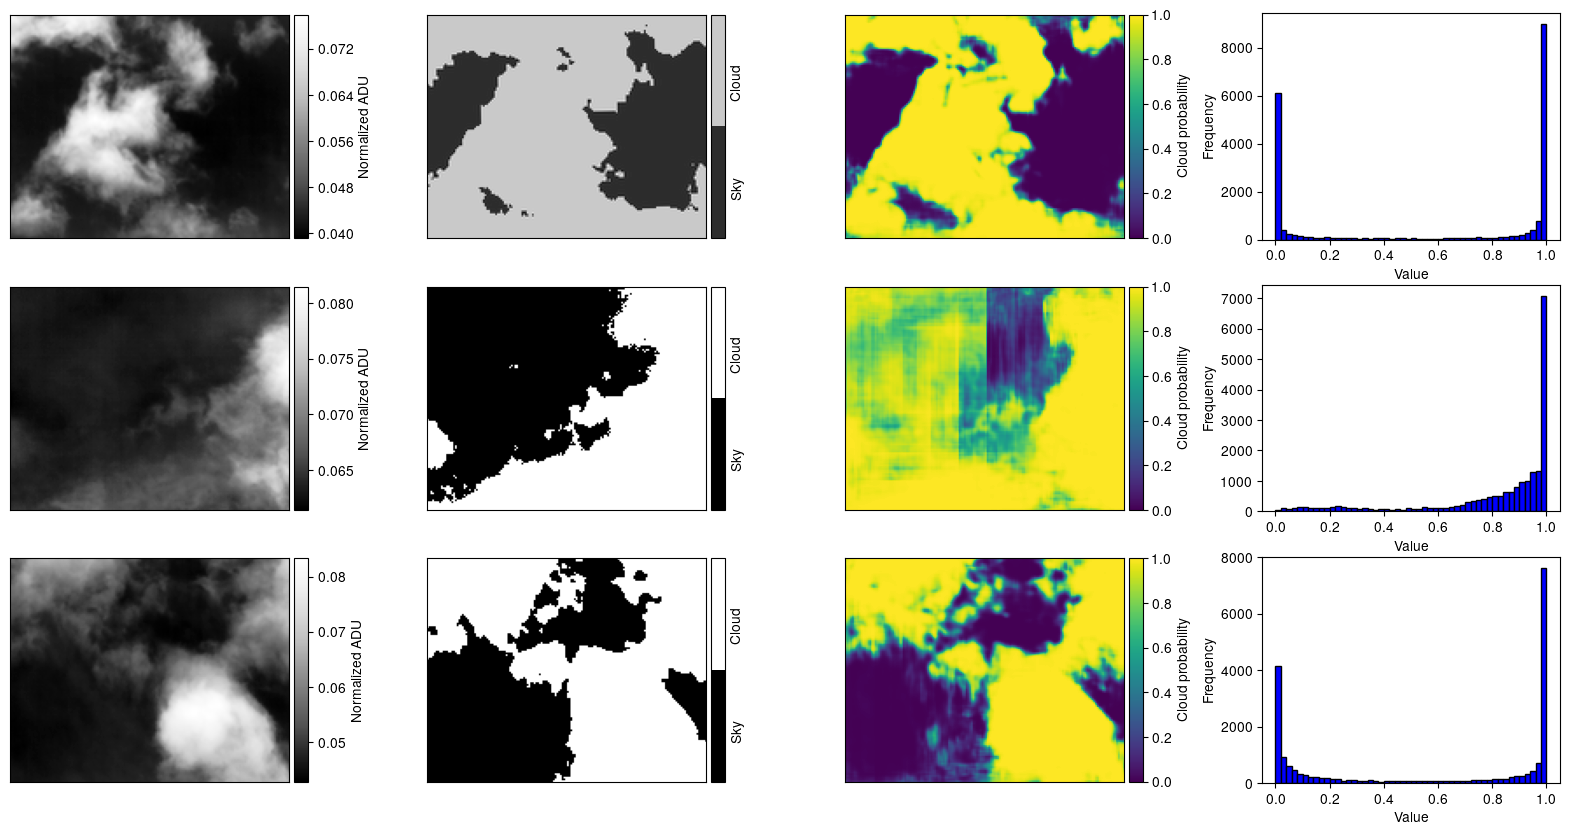

In [32]:
viz.plot_image_preds([train_fits[171], train_fits[46], train_fits[48]], figsize_per_row=(20,10), save=False)

In [30]:
viz.save_image_preds([train_fits[4], train_fits[189], train_fits[171],train_fits[181],train_fits[17]],f'../paper/figures/sample_prediction.pdf',figsize_per_row=(8,1.75))

In [ ]:
viz.save_image_preds([train_fits[155]],f'../paper/figures/sample_prediction155.pdf',figsize_per_row=(8,1.75))
viz.save_image_preds([train_fits[168]],f'../paper/figures/sample_prediction168.pdf',figsize_per_row=(8,1.75))
viz.save_image_preds([train_fits[71]],f'../paper/figures/sample_prediction71.pdf',figsize_per_row=(8,1.75))

Save other plots

In [52]:
viz.plot_roc_from_csv('../Results/LWIRISEG/roc_plot.csv','../paper/figures/roc_plot.pdf')


In [53]:
viz.plot_training_data('../Results/LWIRISEG/metrics.csv','../paper/figures/metrics_loss.pdf')